## Problem 2: CART-RF-ANN


An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


In [ ]:
ins = pd.read_csv("insurance_part2_data.csv")

In [ ]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
ins.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [ ]:
ins.duplicated().sum()

139

In [ ]:
ins[ins.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [ ]:
ins.drop(columns=['Agency_Code','Age'],axis=1,inplace=True)


In [ ]:
ins.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
ins1=ins[['Commision','Sales','Duration']]
ins1.head()


,Commision,Sales,Duration
0,0.70,2.51,7
1,0.00,20.00,34
2,5.94,9.90,3
3,0.00,26.00,4
4,6.30,18.00,53


In [ ]:
ins1=ins1.apply(zscore)
ins1.head()

,Commision,Sales,Duration
0,-0.542807,-0.816433,-0.470051
1,-0.570282,-0.569127,-0.268605
2,-0.337133,-0.711940,-0.499894
3,-0.570282,-0.484288,-0.492433
4,-0.323003,-0.597407,-0.126846


In [ ]:
for col in ins1.columns:
    ins1[col]=np.where(ins1[col] > 3,3,ins1[col] )
    ins1[col]=np.where(ins1[col] < -3,-3,ins1[col] )
 #Treating outliers by changing the zscore to 3, whereever zscore>3 & -3 wherever zcore is <3

In [ ]:
ins1[['Type','Claimed','Channel','Product Name','Destination']]=ins[['Type','Claimed','Channel','Product Name','Destination']]


In [ ]:
ins1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,Airlines,No,Online,Customised Plan,ASIA
1,-0.570282,-0.569127,-0.268605,Travel Agency,No,Online,Customised Plan,ASIA
2,-0.337133,-0.711940,-0.499894,Travel Agency,No,Online,Customised Plan,Americas
3,-0.570282,-0.484288,-0.492433,Travel Agency,No,Online,Cancellation Plan,ASIA
4,-0.323003,-0.597407,-0.126846,Airlines,No,Online,Bronze Plan,ASIA


In [ ]:
 #Treating the columns whose datatype is stored as object, changing into int and will be assigning some codes.
for i in ins1.columns:
    if ins1[i].dtype == 'object':
        ins1[i]=pd.Categorical(ins1[i]).codes


In [ ]:
ins1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commision     3000 non-null   float64
 1   Sales         3000 non-null   float64
 2   Duration      3000 non-null   float64
 3   Type          3000 non-null   int8   
 4   Claimed       3000 non-null   int8   
 5   Channel       3000 non-null   int8   
 6   Product Name  3000 non-null   int8   
 7   Destination   3000 non-null   int8   
dtypes: float64(3), int8(5)
memory usage: 85.1 KB


In [ ]:
ins1.head()


,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,0,0,1,2,0
1,-0.570282,-0.569127,-0.268605,1,0,1,2,0
2,-0.337133,-0.711940,-0.499894,1,0,1,2,1
3,-0.570282,-0.484288,-0.492433,1,0,1,1,0
4,-0.323003,-0.597407,-0.126846,0,0,1,0,0


<Figure size 1080x1080 with 0 Axes>

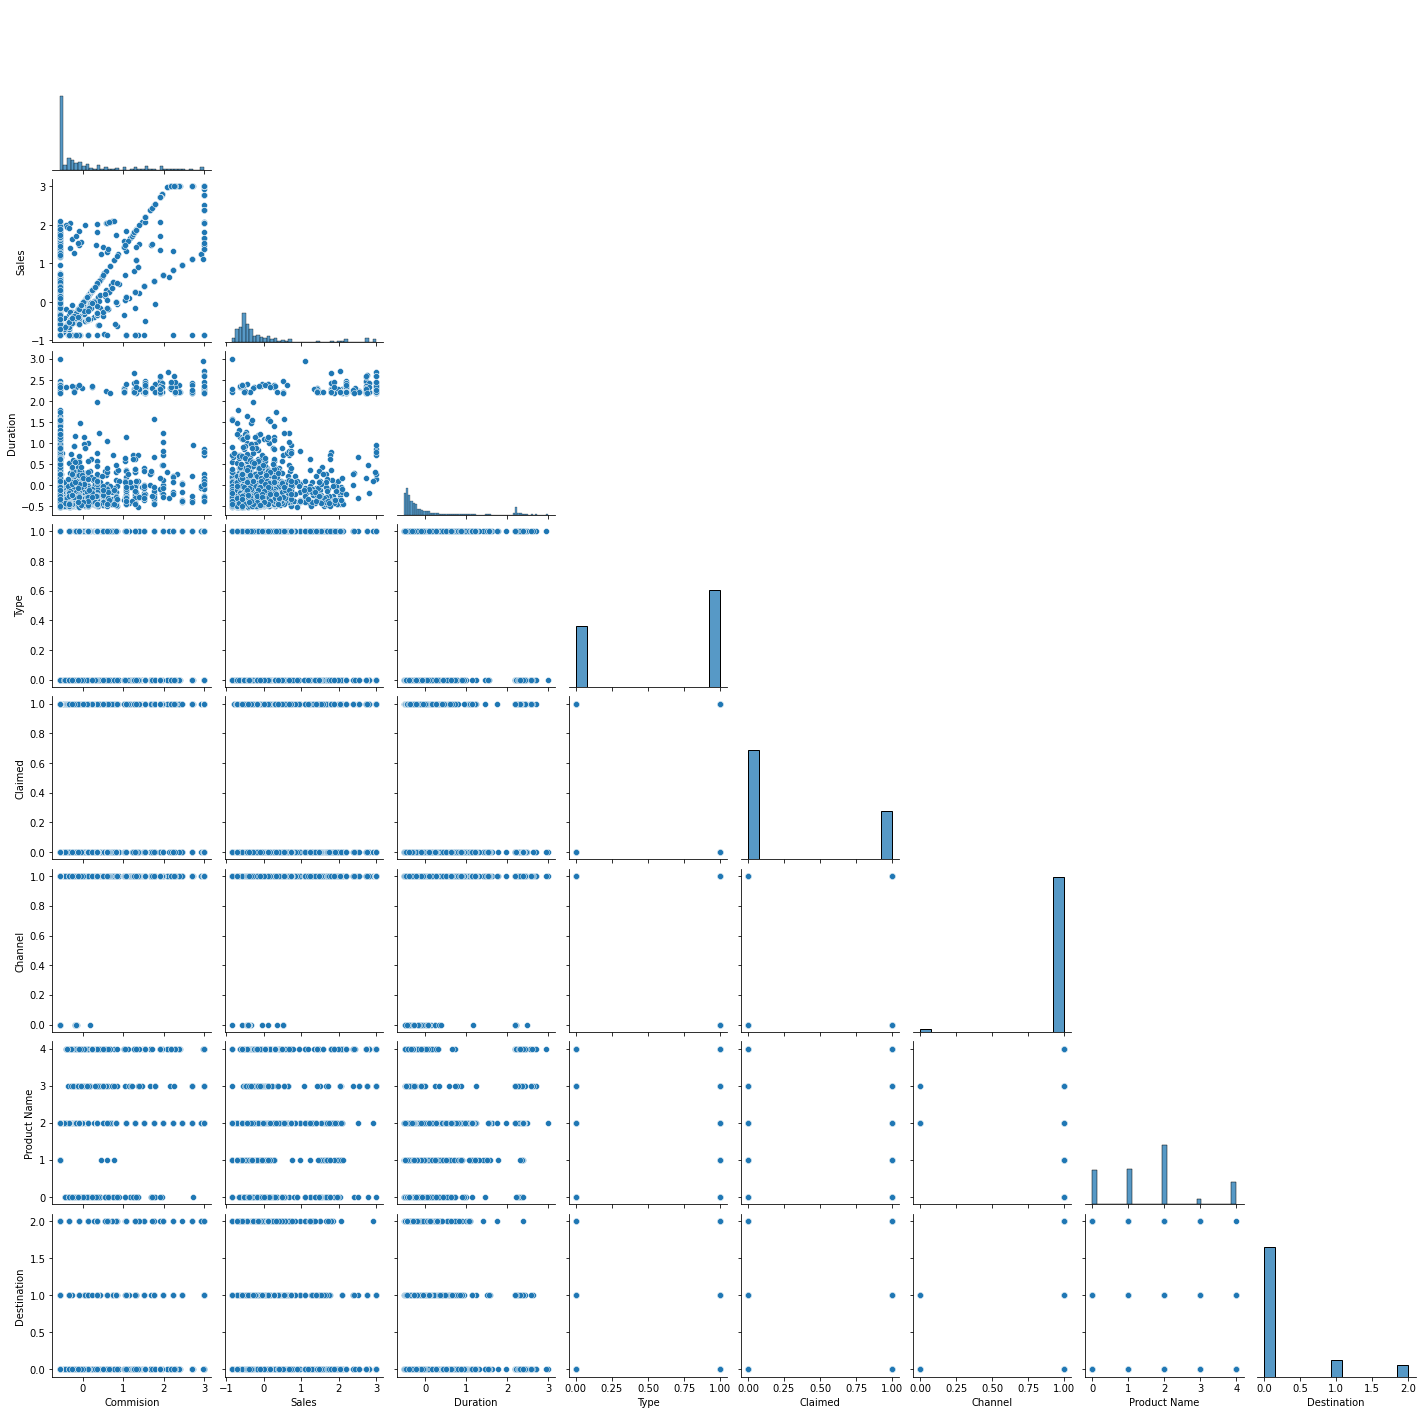

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(ins1, corner=True)


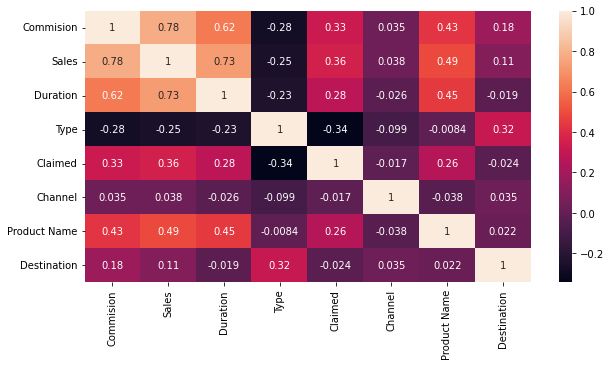

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(ins1.corr(),annot=True)


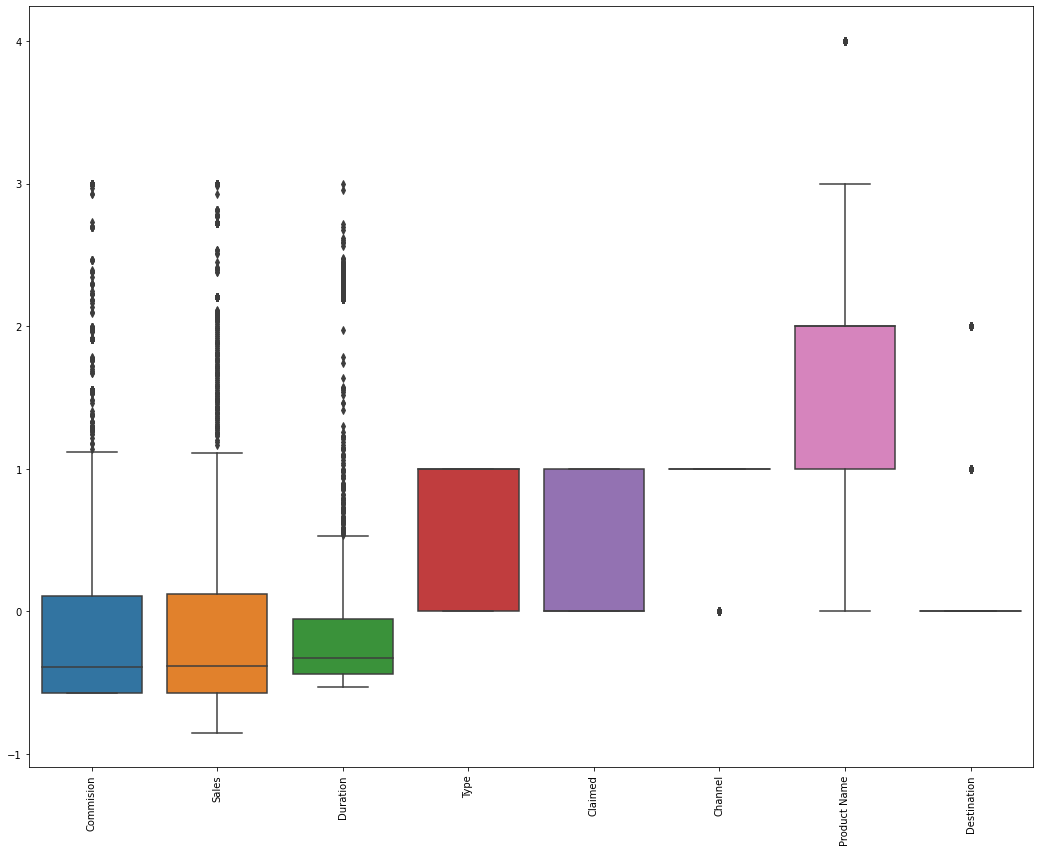

In [ ]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=ins1)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

In [ ]:
X=ins1.drop('Claimed',axis=1)

In [ ]:
Y=ins1.pop('Claimed')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commision     3000 non-null   float64
 1   Sales         3000 non-null   float64
 2   Duration      3000 non-null   float64
 3   Type          3000 non-null   int8   
 4   Channel       3000 non-null   int8   
 5   Product Name  3000 non-null   int8   
 6   Destination   3000 non-null   int8   
dtypes: float64(3), int8(4)
memory usage: 82.2 KB


In [ ]:
Y.count()


3000

  2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.20,random_state=1)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 268 to 1061
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commision     2400 non-null   float64
 1   Sales         2400 non-null   float64
 2   Duration      2400 non-null   float64
 3   Type          2400 non-null   int8   
 4   Channel       2400 non-null   int8   
 5   Product Name  2400 non-null   int8   
 6   Destination   2400 non-null   int8   
dtypes: float64(3), int8(4)
memory usage: 84.4 KB


In [ ]:
train_labels.value_counts(normalize=True)

0    0.692083
1    0.307917
Name: Claimed, dtype: float64

In [ ]:
dt_model=dtc(criterion='gini')

In [ ]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [ ]:
train_char_label = ['No','Yes']

In [ ]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [ ]:
tree.export_graphviz(dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [ ]:
Credit_Tree_File.close()

In [ ]:
param_grid={
    'max_depth':[5,7,9],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15],

}

In [ ]:
dt_model=dtc()

In [ ]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5)

In [ ]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45]})

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [ ]:
reg_dt_model=grid_search.best_estimator_

In [ ]:
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=15)

In [ ]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [ ]:
tree.export_graphviz(reg_dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [ ]:
Credit_Tree_File.close()

In [ ]:
reg_dt_model.feature_importances_

array([0.07696459, 0.18678189, 0.04150516, 0.        , 0.01657592,
       0.67817244, 0.        ])

<BarContainer object of 7 artists>

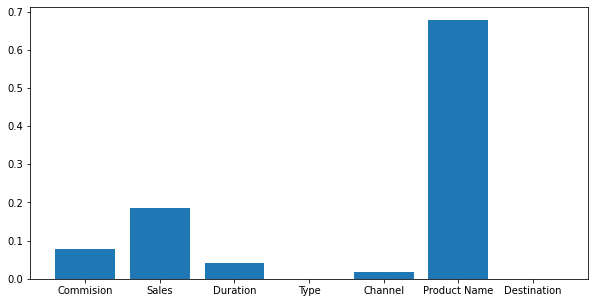

In [ ]:
plt.figure(figsize=(10,5))
plt.bar( [col for col in X_train.columns] ,reg_dt_model.feature_importances_)

In [ ]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

                   Imp
Commision     0.076965
Sales         0.186782
Duration      0.041505
Type          0.000000
Channel       0.016576
Product Name  0.678172
Destination   0.000000


In [ ]:
ytrain_predict=reg_dt_model.predict(X_train)
ytest_predict=reg_dt_model.predict(X_test)

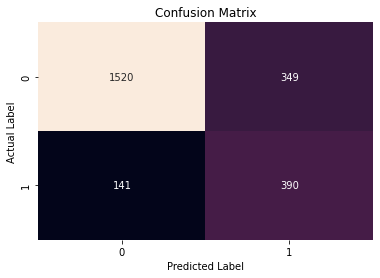

In [ ]:
confusion_matrix(ytrain_predict,train_labels)
sns.heatmap(confusion_matrix(ytrain_predict,train_labels),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytrain_predict,train_labels))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1869
           1       0.53      0.73      0.61       531

    accuracy                           0.80      2400
   macro avg       0.72      0.77      0.74      2400
weighted avg       0.83      0.80      0.81      2400



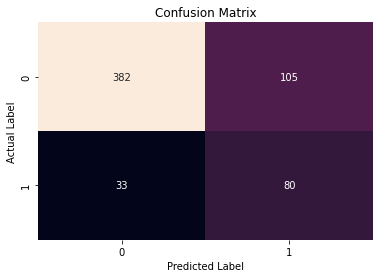

In [ ]:
confusion_matrix(ytest_predict,test_labels)
sns.heatmap(confusion_matrix(ytest_predict,test_labels),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest_predict,test_labels))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       487
           1       0.43      0.71      0.54       113

    accuracy                           0.77       600
   macro avg       0.68      0.75      0.69       600
weighted avg       0.83      0.77      0.79       600



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
probs1=reg_dt_model.predict_proba(X_train)
probs1=probs1[:,1]
roc_auc_score(train_labels,probs1)

0.8314965062538748

In [ ]:
probs2=reg_dt_model.predict_proba(X_test)
probs2=probs2[:,1]
roc_auc_score(test_labels,probs2)

0.7904395962227289

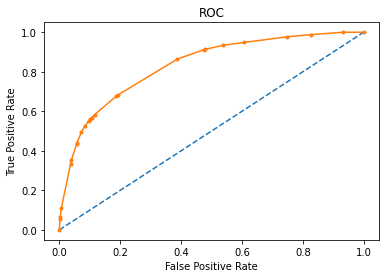

In [ ]:
cart_train_fpr,cart_train_tpr,thresholds=roc_curve(train_labels,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

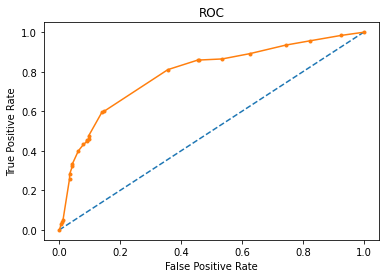

In [ ]:
cart_test_fpr,cart_test_tpr,thresholds=roc_curve(test_labels,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

RANDOM CLASSIFICATION


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfcl=RandomForestClassifier()

In [ ]:
param_grid_rfcl ={
    'n_estimators':[50,100],
    'max_features':[4,5],
    'max_depth':[8,10,12],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15]
}

In [ ]:
grid_search_rfcl=GridSearchCV(estimator=rfcl,param_grid=param_grid_rfcl,cv=5)

In [ ]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [4, 5],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [50, 100]})

In [ ]:
grid_search_rfcl.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 100}

In [ ]:
grid_search_reg_rfcl=grid_search_rfcl.best_estimator_

In [ ]:
grid_search_reg_rfcl.fit(X_train,train_labels)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=45)

In [ ]:
print(pd.DataFrame(grid_search_reg_rfcl.feature_importances_,columns=['Imp'],index=X_train.columns))

                   Imp
Commision     0.229676
Sales         0.211805
Duration      0.101426
Type          0.058296
Channel       0.000907
Product Name  0.384230
Destination   0.013660


<BarContainer object of 7 artists>

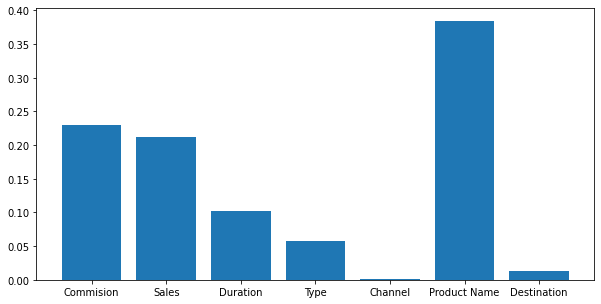

In [ ]:
plt.figure(figsize=(10,5))
plt.bar( [col for col in X_train.columns] ,grid_search_reg_rfcl.feature_importances_)

In [ ]:
ytrain_rf_predict=grid_search_reg_rfcl.predict(X_train)
ytest_rf_predict=grid_search_reg_rfcl.predict(X_test)

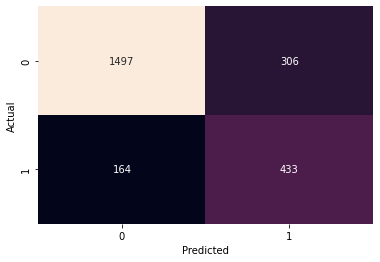

In [ ]:
sns.heatmap(confusion_matrix(ytrain_rf_predict,train_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

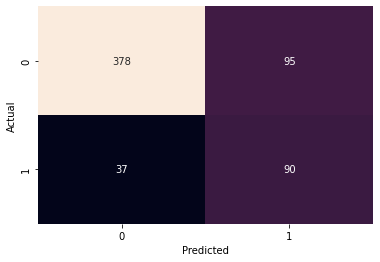

In [ ]:
sns.heatmap(confusion_matrix(ytest_rf_predict,test_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(ytrain_rf_predict,train_labels))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1803
           1       0.59      0.73      0.65       597

    accuracy                           0.80      2400
   macro avg       0.74      0.78      0.76      2400
weighted avg       0.82      0.80      0.81      2400



In [ ]:
print(classification_report(ytest_rf_predict,test_labels))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       473
           1       0.49      0.71      0.58       127

    accuracy                           0.78       600
   macro avg       0.70      0.75      0.71       600
weighted avg       0.82      0.78      0.79       600



In [ ]:
probs_rf_train=grid_search_reg_rfcl.predict_proba(X_train)
probs_rf_train=probs_rf_train[:,1]
roc_auc_score(train_labels,probs_rf_train)

0.867145588641435

In [ ]:
probs_rf_test=grid_search_reg_rfcl.predict_proba(X_test)
probs_rf_test=probs_rf_test[:,1]
roc_auc_score(test_labels,probs_rf_test)

0.8185672419407359

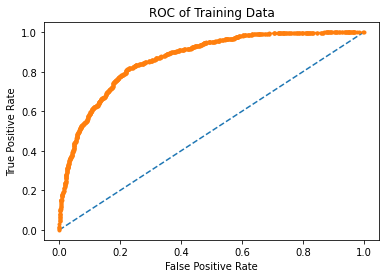

In [ ]:
rf_train_fpr,rf_train_tpr,thresholds=roc_curve(train_labels,probs_rf_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_fpr,rf_train_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Training Data')
plt.show()

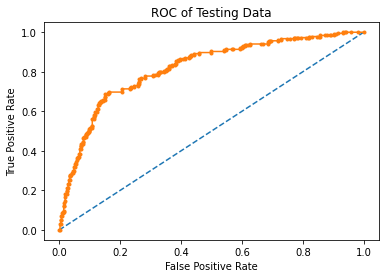

In [ ]:
rf_test_fpr,rf_test_tpr,thresholds=roc_curve(test_labels,probs_rf_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_test_fpr,rf_test_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Testing Data')
plt.show()

ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf_reg=MLPClassifier()

In [ ]:
param_grid_clf={
    'hidden_layer_sizes':[100,200],
    'max_iter':[2000,3000],
    'learning_rate_init':[0.001,0.0001],
    'random_state':[1]
}

In [ ]:
grid_search_clf=GridSearchCV(estimator=clf_reg,param_grid=param_grid_clf,cv=5)

In [ ]:
grid_search_clf.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [100, 200],
                         'learning_rate_init': [0.001, 0.0001],
                         'max_iter': [2000, 3000], 'random_state': [1]})

In [ ]:
grid_search_clf.best_estimator_

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

In [ ]:
grid_search_clf.best_params_

{'hidden_layer_sizes': 100,
 'learning_rate_init': 0.001,
 'max_iter': 2000,
 'random_state': 1}

In [ ]:
clf=grid_search_clf.best_estimator_

In [ ]:
clf.fit(X_train,train_labels)

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

In [ ]:
test_clf_pred=clf.predict(X_test)
train_clf_pred=clf.predict(X_train)

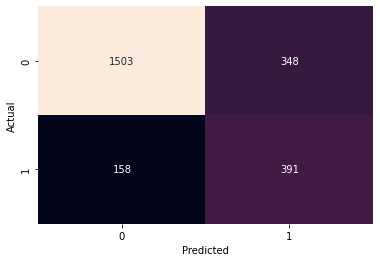

In [ ]:
sns.heatmap(confusion_matrix(train_clf_pred,train_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(train_clf_pred,train_labels))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1851
           1       0.53      0.71      0.61       549

    accuracy                           0.79      2400
   macro avg       0.72      0.76      0.73      2400
weighted avg       0.82      0.79      0.80      2400



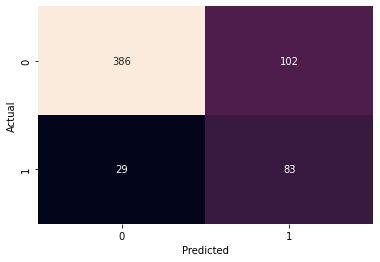

In [ ]:
sns.heatmap(confusion_matrix(test_clf_pred,test_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(test_clf_pred,test_labels))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       488
           1       0.45      0.74      0.56       112

    accuracy                           0.78       600
   macro avg       0.69      0.77      0.71       600
weighted avg       0.84      0.78      0.80       600



In [ ]:
probs_clf_train=clf.predict_proba(X_train)
probs_clf_train=probs_clf_train[:,1]
roc_auc_score(train_labels,probs_clf_train)

0.8416351725772906

In [ ]:
probs_clf_test=clf.predict_proba(X_test)
probs_clf_test=probs_clf_test[:,1]
roc_auc_score(test_labels,probs_clf_test)

0.8125626831650928

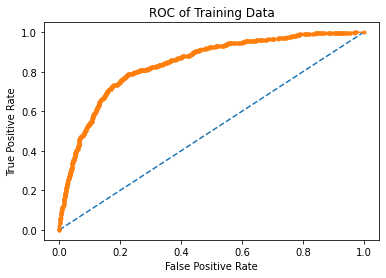

In [ ]:
ann_train_fpr,ann_train_tpr,thresholds=roc_curve(train_labels,probs_clf_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ann_train_fpr,ann_train_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Training Data')
plt.show()

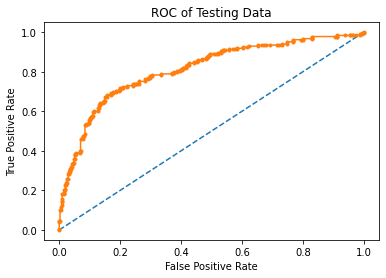

In [ ]:
ann_test_fpr,ann_test_tpr,thresholds=roc_curve(test_labels,probs_clf_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ann_test_fpr,ann_test_tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Testing Data')
plt.show()

In [ ]:
ins1.head()

,Commision,Sales,Duration,Type,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,0,1,2,0
1,-0.570282,-0.569127,-0.268605,1,1,2,0
2,-0.337133,-0.711940,-0.499894,1,1,2,1
3,-0.570282,-0.484288,-0.492433,1,1,1,0
4,-0.323003,-0.597407,-0.126846,0,1,0,0


2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


ROC Curve for the 3 models on the Training data


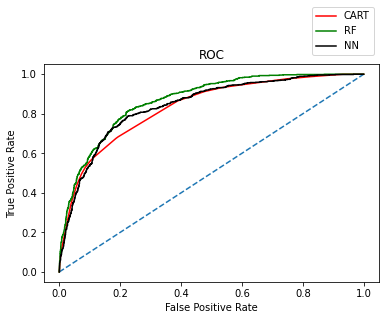

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

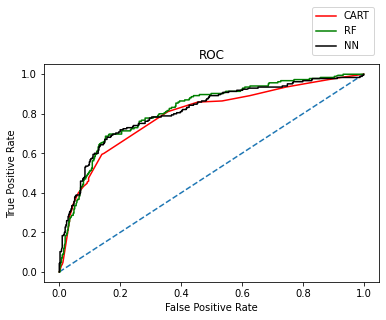

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Conclusion
The RF model has better accuracy, precsion, recall, f1 score better than other two CART & NN

The second best model is Neural Networks. Model evaluation parameters for NN is quite near to RF .



2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations





*    	As per the data 90% of insurance is done by online channel. Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.
* 	Almost all the offline business has a claimed associated
 	Based on the model we are getting 80% accuracy, they need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern.
* 	More sales happen via Agency than Airlines. The trend shows the claim are processed more at Airline.
* 	The following points needs to be taken care :  Reduce claims cycle time, Increase customer satisfaction, Combat fraud , Optimize claims recovery, Reduce claim handling costs


